In [34]:
import sentiment as sentimentinterface
import classify
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.switch_backend('agg')
import matplotlib.ticker as ticker
%matplotlib inline

import importlib

In [65]:
importlib.reload(sentimentinterface)
CONF = np.arange(0.35, 0.60, 0.05)
acc = []
portions = []
for conf in CONF:
    print("Reading data")
    tarfname = "data/sentiment.tar.gz"
    sentiment = sentimentinterface.read_data(tarfname)

    importlib.reload(sentimentinterface)
    opt_diff = 0.4
    opt_max = 0.2
    opt_min = 3
    opt_c = 3.7
    stop_words = sentimentinterface.generate_stop_words(sentiment, diff = opt_diff)
    sentimentinterface.vectorize_data(sentiment, stop_words = stop_words, max_df = opt_max, min_df = opt_min)
    cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = opt_c)

    unlabeled = sentimentinterface.read_unlabeled(tarfname, sentiment)
    yp = cls.predict_proba(unlabeled.X)
    original_size = len(unlabeled.data)

    importlib.reload(sentimentinterface)
    stop_words = sentimentinterface.generate_stop_words(sentiment, diff = opt_diff)
    sentimentinterface.vectorize_data(sentiment, stop_words = stop_words, max_df = opt_max, min_df = opt_min)
    while(1):
        cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = opt_c)
        yprob = cls.predict_proba(unlabeled.X)
        yp = cls.predict(unlabeled.X)

        extend_data = []
        extend_labels = []
        removes = []
        for i in range(len(yprob)):
            if abs(yprob[i][1] - yprob[i][0]) > conf:
                extend_data.append(unlabeled.data[i])
                if yp[i] == 1:
                    extend_labels.append("POSITIVE")
                else:
                    extend_labels.append("NEGATIVE")
                removes.append(i)

        if len(removes) == 0:
            break

        sentimentinterface.extend_training(sentiment, extend_data, extend_labels)

        stop_words = sentimentinterface.generate_stop_words(sentiment, diff = opt_diff)
        sentimentinterface.vectorize_data(sentiment, stop_words = stop_words, max_df = opt_max, min_df = opt_min)

        sentimentinterface.remove_data(unlabeled, sentiment, removes)
        
    final_size = len(unlabeled.data)
    portion = (original_size - final_size) / original_size
    portions.append(portion)
    acc.append(classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev'))
    print("Original size:", original_size, "Final size:", final_size)
    print("Adapted portion:", portion)

Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels
sentiment/unlabeled.tsv
(91524, 2123)
  Accuracy on dev is: 0.7947598253275109
Original size: 91524 Final size: 3983
Adapted portion: 0.9564813600804161
Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels
sentiment/unlabeled.tsv
(91524, 2123)
  Accuracy on dev is: 0.7903930131004366
Original size: 91524 Final size: 5117
Adapted portion: 0.9440911673440846
Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels
sentiment/unlabeled.tsv
(91524, 2123)
  Accuracy on dev is: 0.7947598253275109
Original size: 91524 Final size: 6280
Adapted portion: 0.931384117827018
Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels
sentiment/unlabeled.tsv
(91524, 2123)
  Accuracy on dev is: 0.78165938

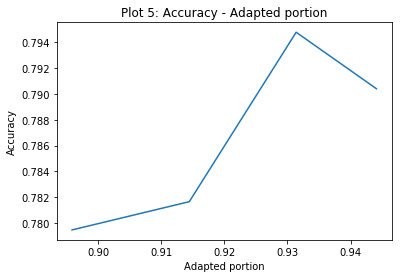

In [74]:
plt.plot(portions[1:], acc[1:])
plt.title("Plot 5: Accuracy - Adapted portion")
plt.xlabel("Adapted portion")
plt.ylabel("Accuracy")
plt.show()

In [60]:
classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev')
print("\nReading unlabeled data")
unlabeled = sentimentinterface.read_unlabeled(tarfname, sentiment)
print("Writing predictions to a file")
sentimentinterface.write_pred_kaggle_file(unlabeled, cls, "data/sentiment-pred.csv", sentiment)

  Accuracy on dev is: 0.7903930131004366

Reading unlabeled data
sentiment/unlabeled.tsv
(91524, 11922)
Writing predictions to a file
